In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

network model:              Erdos-Reyni
mean degree centrality=     0.09975575575575575
max degree centrality=      0.13013013013013014



100%|██████████| 200/200 [00:01<00:00, 162.48it/s]


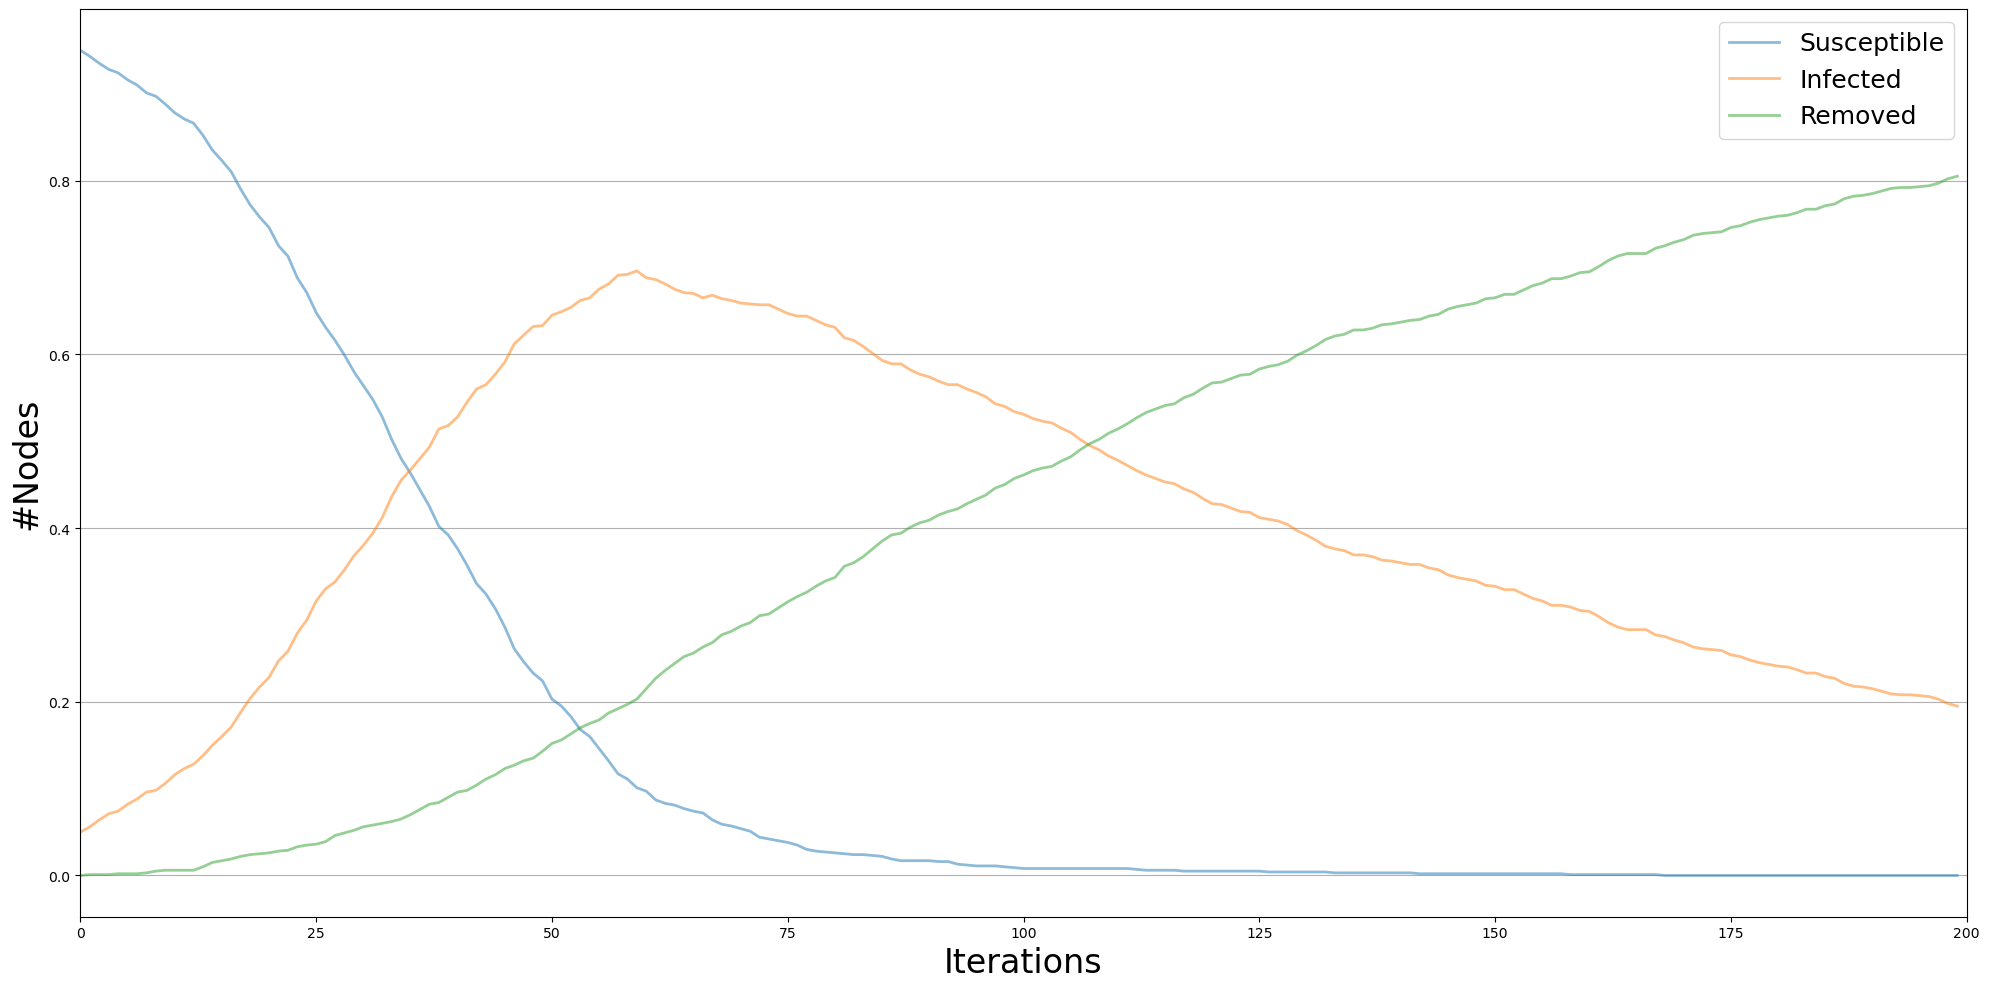

network model:              Watts-Strogatz
mean degree centrality=     0.10010010010010009
max degree centrality=      0.11311311311311312



100%|██████████| 200/200 [00:00<00:00, 207.12it/s]


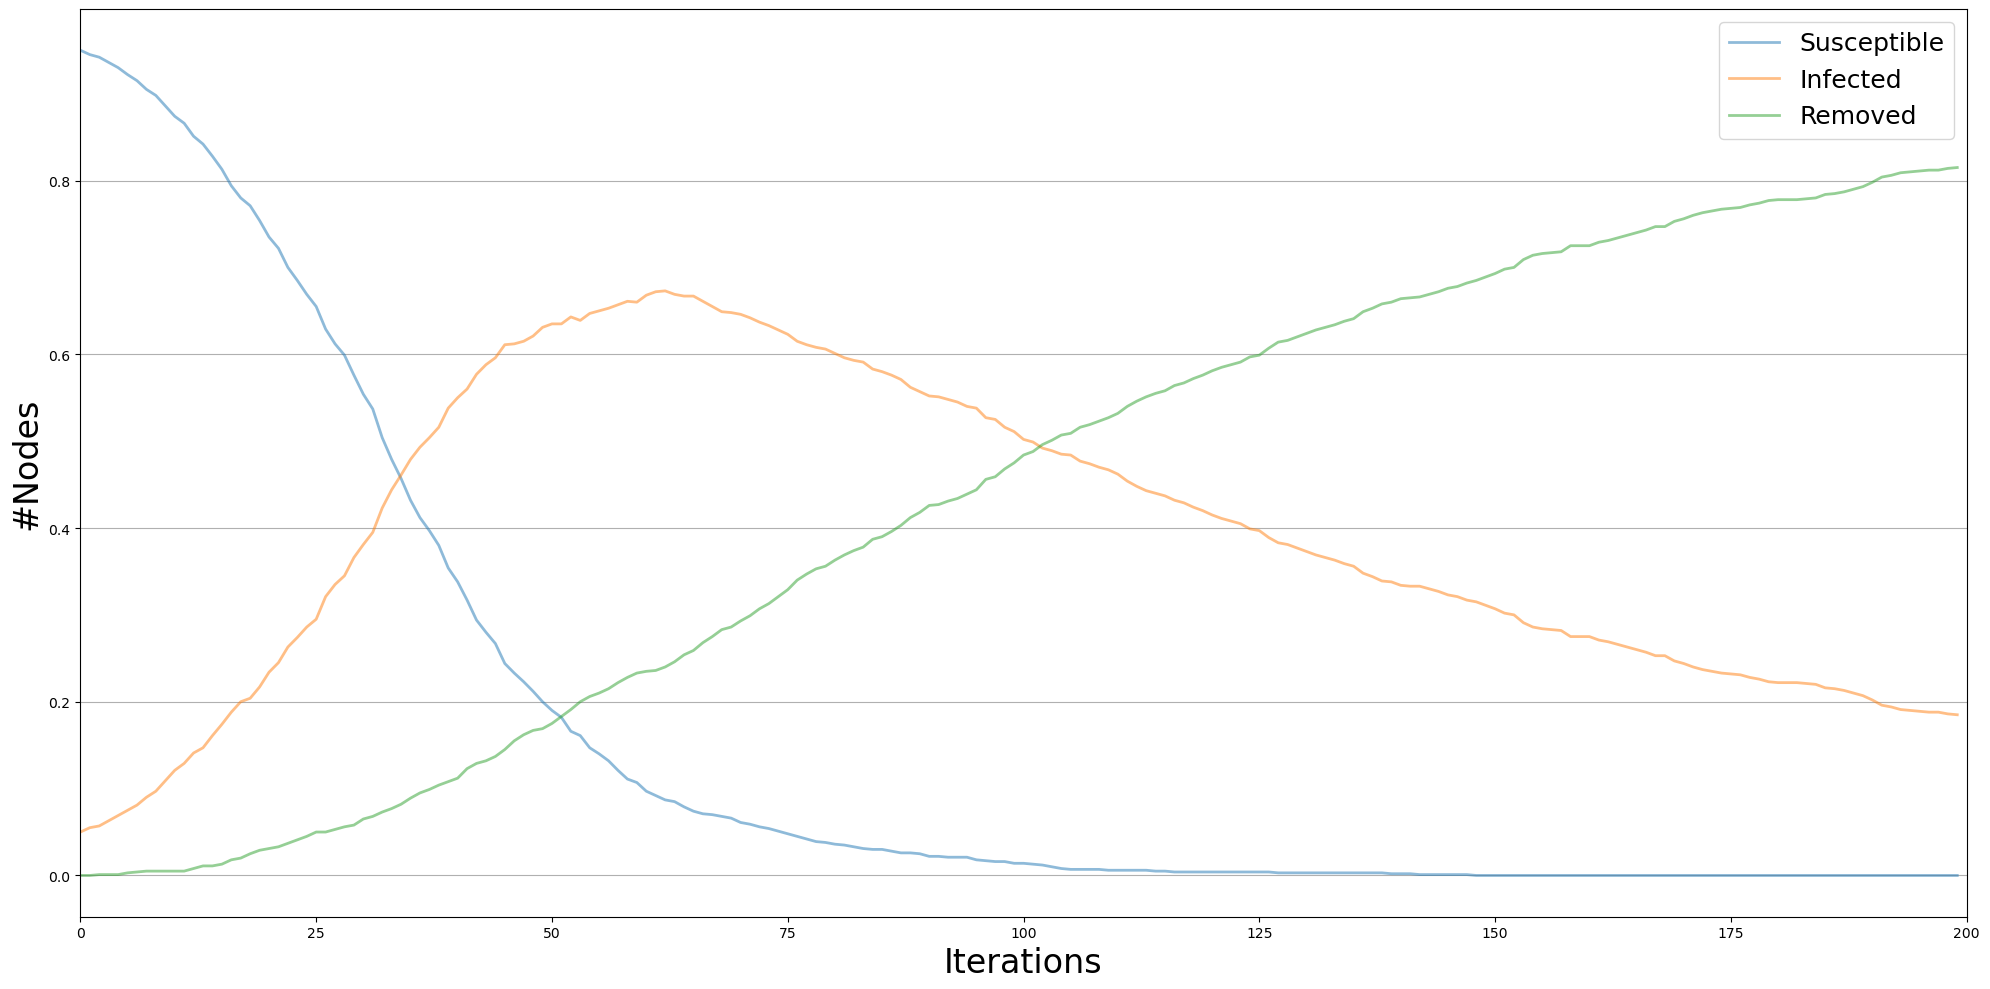

network model:              Barabasi Albert
mean degree centrality=     0.18018018018018017
max degree centrality=      0.5295295295295295



100%|██████████| 200/200 [00:01<00:00, 150.62it/s]


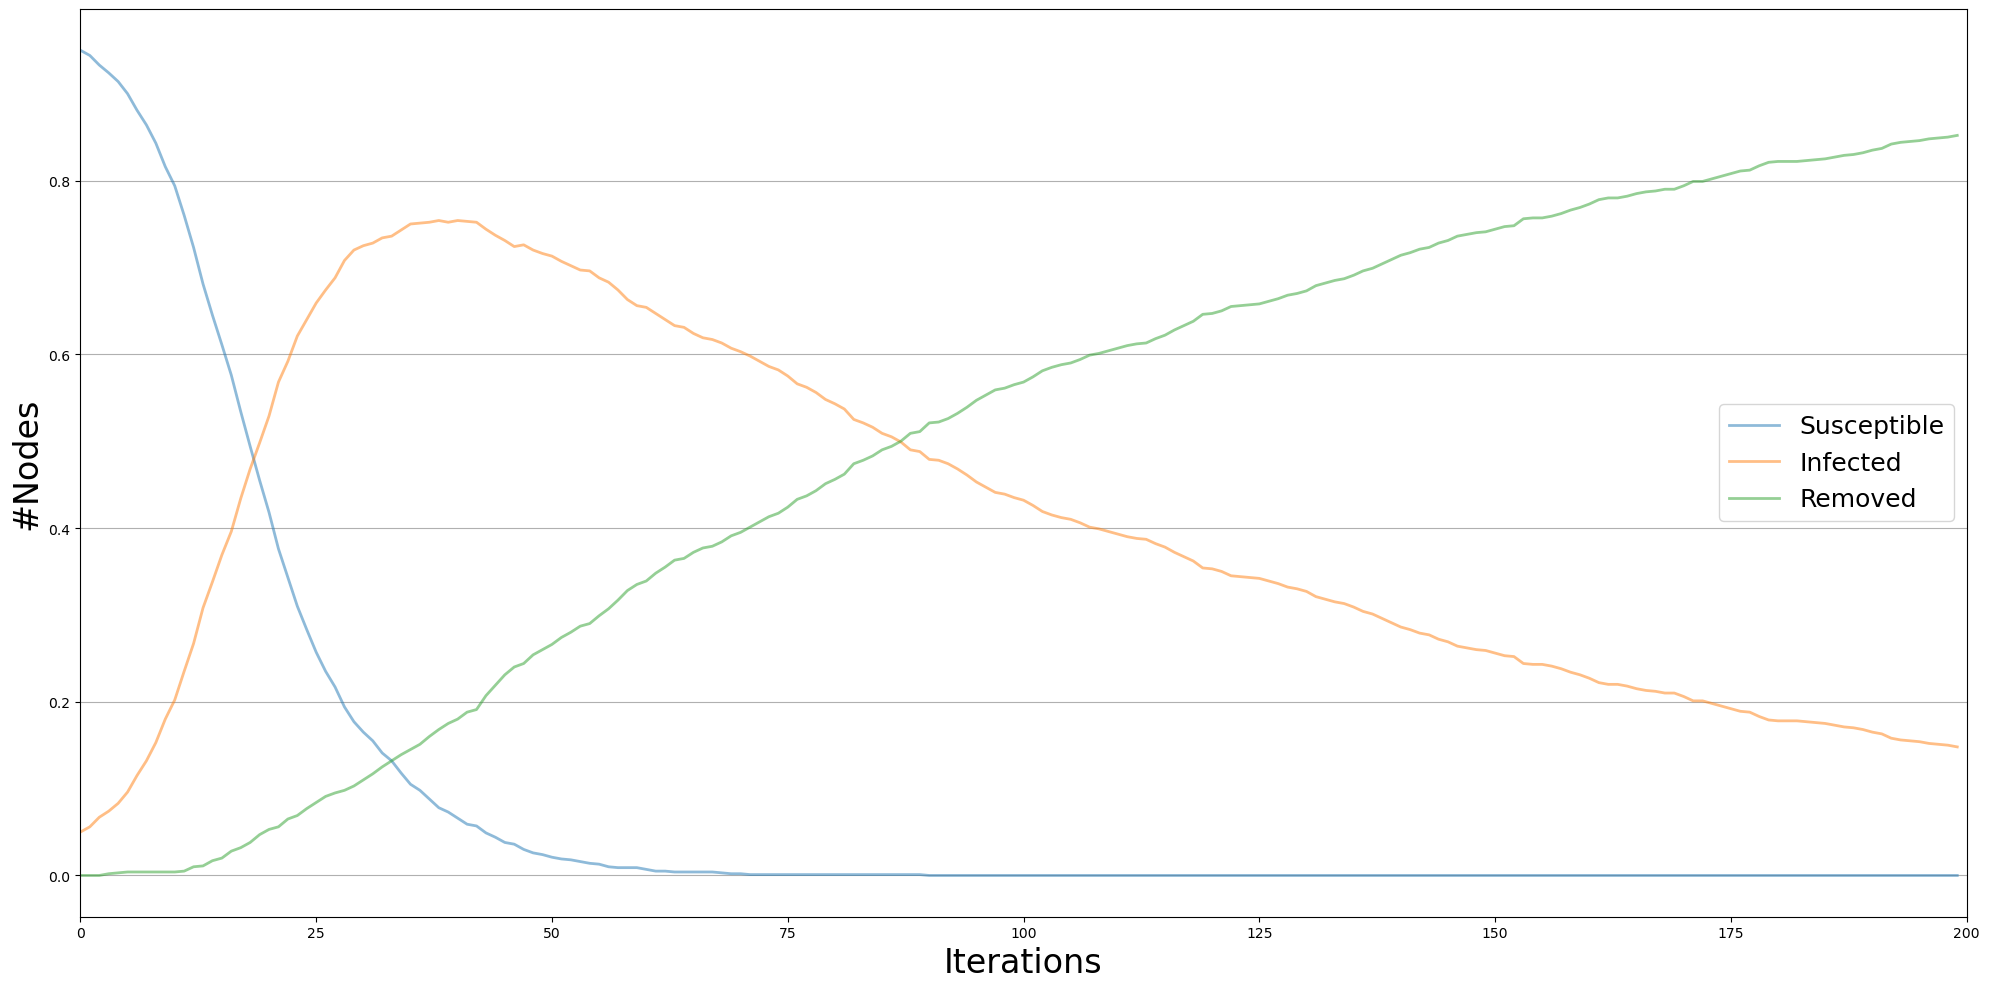

In [11]:
#Parameters

#Network parameters
n = 1000 # for all model types, (int) The number of nodes.
p = 0.1 # for Erdos-Reyni & Watts_strogatz, (float) Probability for edge creation & The probability of rewiring each edge, respectively.
k = 100 # for Watts_strogatz, (int) Each node is joined with its `k` nearest neighbors in a ring topology.
m = 100 # for Barabasi Albert, (int) Number of edges to attach from a new node to existing nodes.

#SIR parameters
sirBeta = 0.001
sirGamma = 0.01
fracI = 0.05
#Simulation parameters
numIterations = 200

# Network Definition
g0 = nx.erdos_renyi_graph(n, p)
g1 = nx.watts_strogatz_graph(n,k,p)
g2 = nx.barabasi_albert_graph(n,m)
model_network_names = {g0:'Erdos-Reyni',g1:'Watts-Strogatz',g2:'Barabasi Albert'}

#nx.draw(g1)
#plt.show()
#nx.draw(g2)
#plt.show()
#nx.draw(g3)
#plt.show()
# Model Selection
degree_sequence = np.zeros([3,n])
for g in [g0,g1,g2]:
    #average fraction that all nodes are connected to
    #high degree, betweenness and closeness, are probably most interesting measures for "interception" opportunities when vaccinating 
    
    print(f'network model:              {model_network_names[g]}')
    print(f'mean degree centrality=     {np.mean(a=list(nx.degree_centrality(g).values()))}')
    print(f'max degree centrality=      {np.max(a=list(nx.degree_centrality(g).values()))}')
    print()
    
    #degree_sequence[] = sorted((d for n, d in g.degree()), reverse=True)
    
    #nx.draw(g)
    #plt.show()
    #print(*nx.degree_centrality(g).values())
    
    # Model Definition
    model = ep.SIRModel(g)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('beta', sirBeta)
    config.add_model_parameter('gamma', sirGamma)
    config.add_model_parameter("fraction_infected", fracI)
    model.set_initial_status(config)
    
    # Simulation
    iterations = model.iteration_bunch(numIterations,progress_bar=True)
    trends = model.build_trends(iterations)
                            
    viz = DiffusionTrend(model, trends)
    viz.plot()
    
model.reset()

In [70]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

ValueError: 'a' cannot be empty unless no samples are taken

In [71]:
# Simulation
iterations = model.iteration_bunch(200,progress_bar=True)
trends = model.build_trends(iterations)

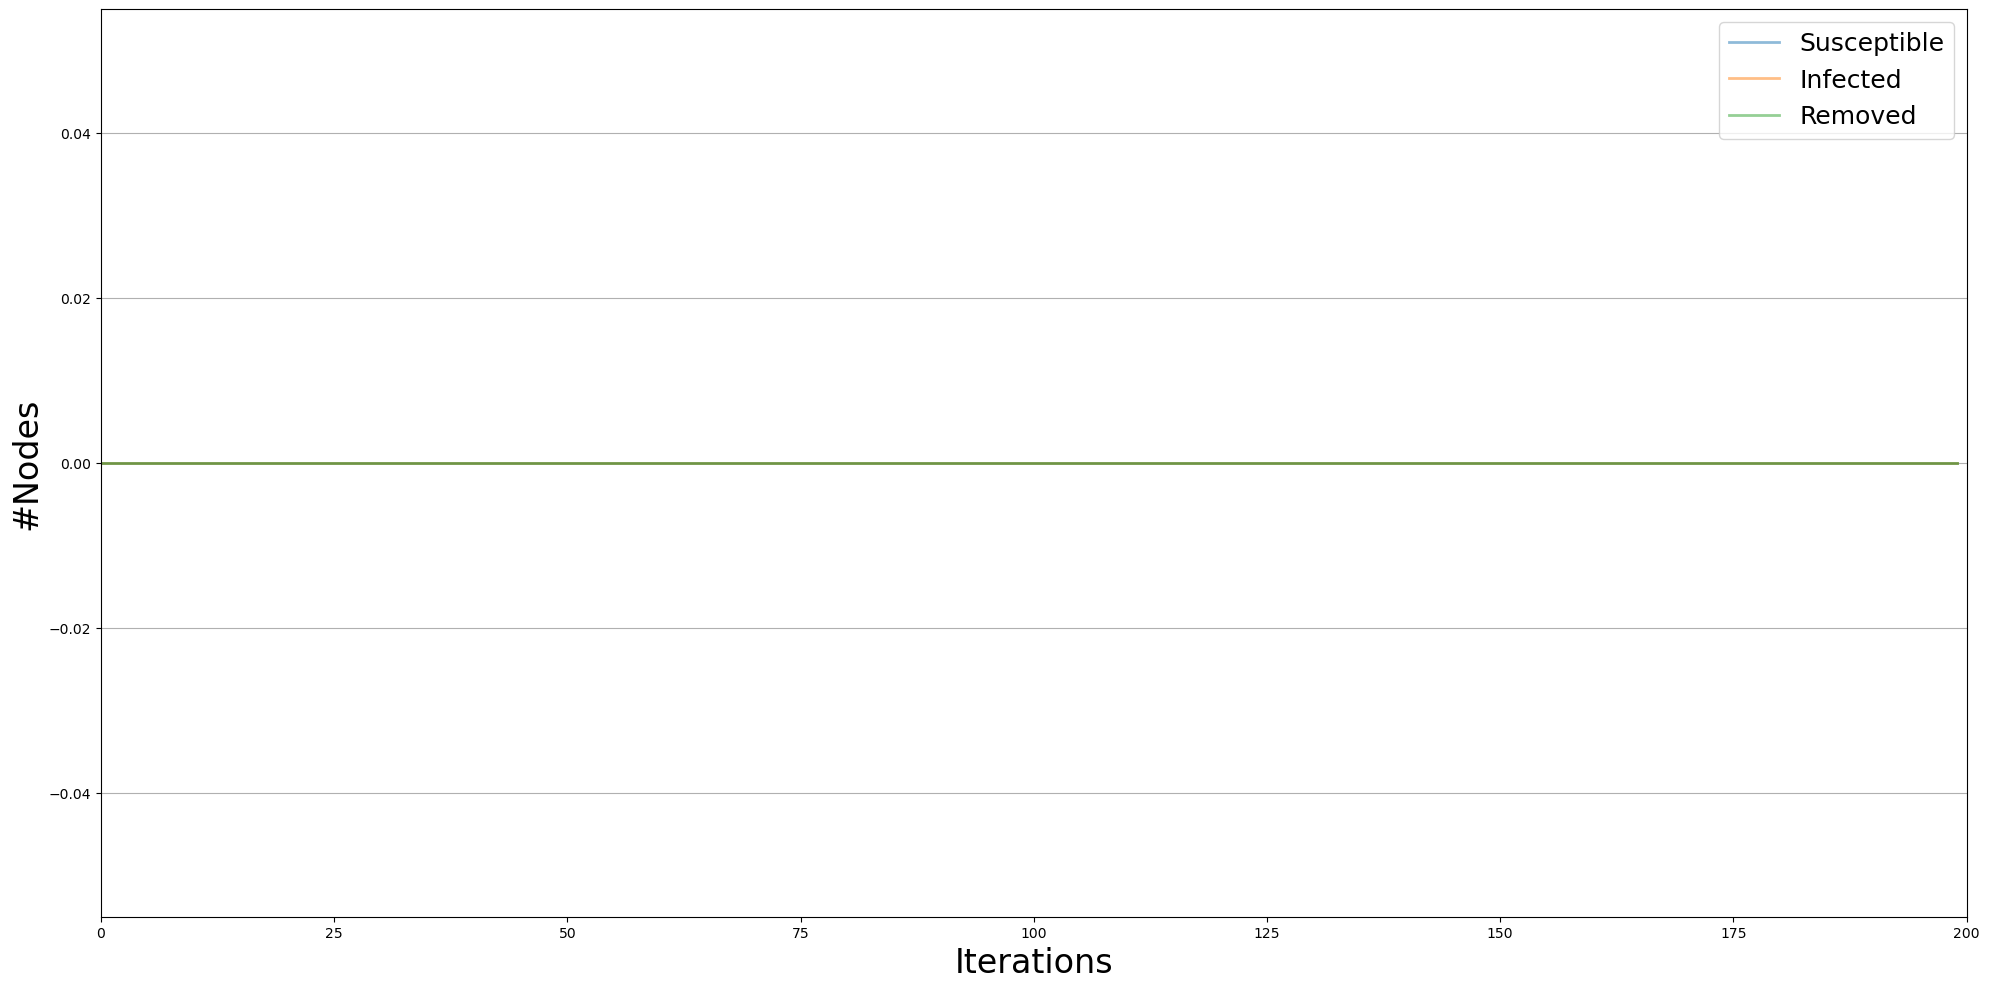

In [72]:
viz = DiffusionTrend(model, trends)
viz.plot()

In [73]:
model.reset()

ValueError: 'a' cannot be empty unless no samples are taken